# Contour map to STL


In [4]:
#importing important libraries
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
from stl import mesh
from PIL import Image


# Step 1: Improting Image

In [5]:
#getting file path
path = input("please enter the file path of the image or n if image is in current directory with name 'image.png'")

#opening image
if path == "n":
    #opening image
    img = Image.open('image.png').convert('L')
    #saving for future reference as needed
    img.save('greyscale.png')
else:
    #opening image
    img = Image.open(path).convert('L')
    #saving for future reference as needed
    img.save('greyscale.png')



# Step 2: Creating imgArray array

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


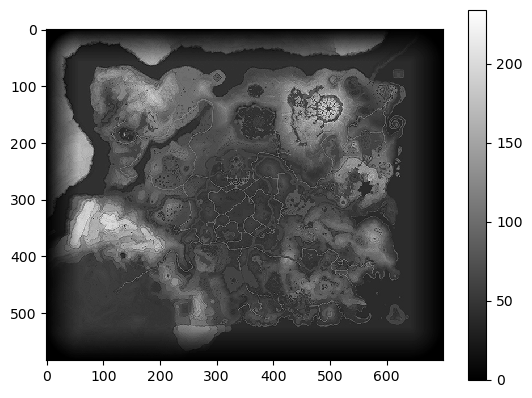

In [6]:
#using numpy to make 2D array of all pixel values
imgArray = np.asarray(img)

#printing for confirmation of proper form
print(imgArray)

#showing imported image
plt.imshow(imgArray, cmap='gray', interpolation='nearest')

#Add colorbar to the right of the heatmap
plt.colorbar()

#Show the plot
plt.show()

# Step 3: Defining Scale

In [21]:
#defining length and width scale
width = 1.0  # User-defined width of each pixel
length = 1.0  # User-defined length of each pixel

#defining vertical scale
scale = 1/4


# Step 4: Creating STL and visualizing output

In [19]:
#creating 2 functions for the stl creation process

def generate_mesh(width, length, scale, imgArray):
    # Create a 3D mesh
    x, y = np.meshgrid(np.arange(0, width * imgArray.shape[1], width),
                       np.arange(0, length * imgArray.shape[0], length))
    z = imgArray*scale

    # Create the mesh object
    vertices = np.array([x.flatten(), y.flatten(), z.flatten()]).T

    # Calculate faces
    faces = []
    for i in range(imgArray.shape[0] - 1):
        for j in range(imgArray.shape[1] - 1):
            index = i * imgArray.shape[1] + j
            face1 = [index, index + 1, index + imgArray.shape[1] + 1]
            face2 = [index, index + imgArray.shape[1] + 1, index + imgArray.shape[1]]
            faces.extend([face1, face2])

    # Create the mesh object
    mesh_obj = mesh.Mesh(np.zeros(len(faces), dtype=mesh.Mesh.dtype))
    for i, face in enumerate(faces):
        for j in range(3):
            mesh_obj.vectors[i][j] = vertices[face[j]]

    return mesh_obj

def save_stl(mesh_obj, filename):
    # Save the mesh to an STL file
    mesh_obj.save(filename)

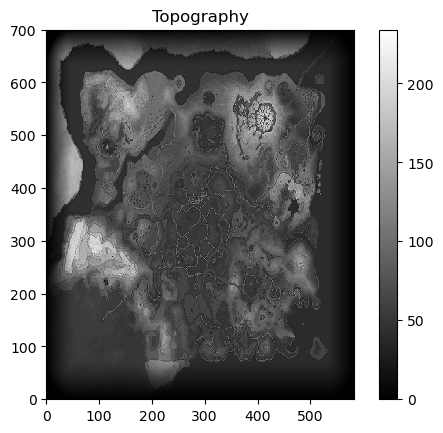

In [22]:
mesh_obj = generate_mesh(width, length, scale, imgArray)
stl_filename = 'topography.stl'
save_stl(mesh_obj, stl_filename)

# Optional: Plot the 2D array for visualization
plt.imshow(imgArray, cmap='gray', interpolation='nearest', extent=[0, width * imgArray.shape[0], 0, length * imgArray.shape[1]])
plt.colorbar()
plt.title('Topography')
plt.show()